In [15]:
import numpy as np

In [16]:
import pandas as pd

In [17]:
np.random.seed(42)


In [96]:
employee_ids=[f"Emp_{str(i).zfill(3)}"for i in range(1,31)]
dates = pd.date_range("2025-07-01",periods=30,freq="D")

In [132]:
employee_ids

['Emp_001',
 'Emp_002',
 'Emp_003',
 'Emp_004',
 'Emp_005',
 'Emp_006',
 'Emp_007',
 'Emp_008',
 'Emp_009',
 'Emp_010',
 'Emp_011',
 'Emp_012',
 'Emp_013',
 'Emp_014',
 'Emp_015',
 'Emp_016',
 'Emp_017',
 'Emp_018',
 'Emp_019',
 'Emp_020',
 'Emp_021',
 'Emp_022',
 'Emp_023',
 'Emp_024',
 'Emp_025',
 'Emp_026',
 'Emp_027',
 'Emp_028',
 'Emp_029',
 'Emp_030']

In [133]:
data={
    "Data":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [134]:
df=pd.DataFrame(data)

In [135]:
df.to_csv("employee_working_hours.csv",index=False)

In [136]:

df_csv=pd.read_csv("employee_working_hours.csv")


In [137]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Data Employee_ID  Working_Hours
0  2025-07-01     Emp_001           4.85
1  2025-07-02     Emp_001           7.43
2  2025-07-03     Emp_001           5.11
3  2025-07-04     Emp_001           5.67
4  2025-07-05     Emp_001           5.31
       Working_Hours
count     900.000000
mean        6.912289
std         1.718295
min         4.000000
25%         5.407500
50%         6.865000
75%         8.370000
max        10.000000
30


In [148]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [149]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [150]:
avg_daily

Employee_ID
Emp_001    6.817667
Emp_002    6.807667
Emp_003    6.369333
Emp_004    7.319000
Emp_005    7.031000
Emp_006    7.179667
Emp_007    6.688000
Emp_008    7.056333
Emp_009    6.776667
Emp_010    7.397333
Emp_011    7.143000
Emp_012    6.480000
Emp_013    6.875667
Emp_014    6.439333
Emp_015    7.300000
Emp_016    7.362667
Emp_017    6.618333
Emp_018    6.965000
Emp_019    6.525333
Emp_020    7.201000
Emp_021    6.801333
Emp_022    6.918000
Emp_023    6.989333
Emp_024    7.030000
Emp_025    7.252667
Emp_026    6.624667
Emp_027    6.537000
Emp_028    6.597000
Emp_029    7.274000
Emp_030    6.991667
Name: Working_Hours, dtype: float64

In [140]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]<threshold_high
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Data Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
0  2025-07-01     Emp_001           4.85           True            True
1  2025-07-02     Emp_001           7.43          False            True
2  2025-07-03     Emp_001           5.11          False            True
3  2025-07-04     Emp_001           5.67          False            True
4  2025-07-05     Emp_001           5.31          False            True


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

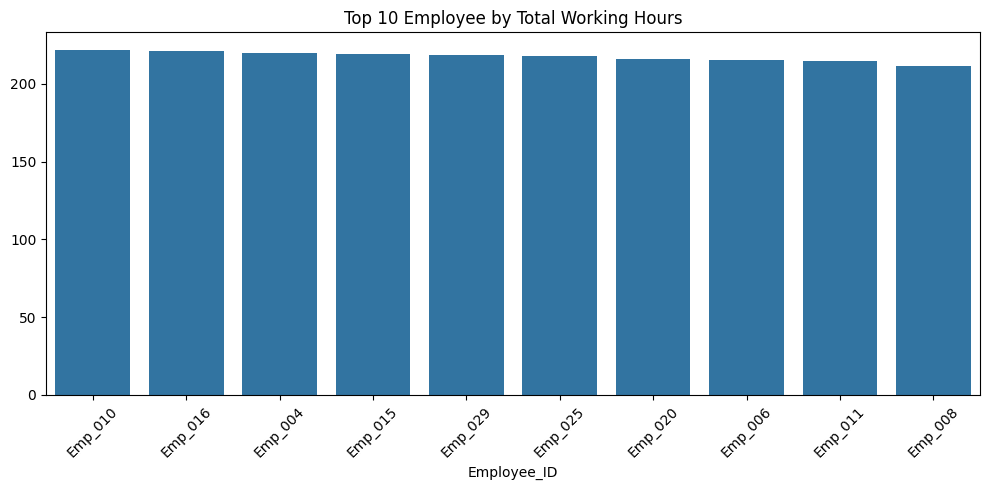

In [142]:
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total Working Hours")
plt.tight_layout()
plt.show()


In [156]:
Grades=df.loc[(df["Employee_ID"]=="EMP_010")]

In [157]:
Grades.head()

,Data,Employee_ID,Working_Hours
